<a href="https://colab.research.google.com/github/UEC-MaTa/News_Aggregator/blob/main/TensorFlow_Hub_%E3%81%AB%E3%82%88%E3%82%8B%E3%83%86%E3%82%AD%E3%82%B9%E3%83%88%E3%81%AE%E5%88%86%E9%A1%9E_%E6%98%A0%E7%94%BB%E3%83%AC%E3%83%93%E3%83%A5%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# TensorFlow Hub によるテキストの分類: 映画レビュー

https://www.tensorflow.org/tutorials/keras/text_classification_with_hub?hl=ja

https://tensorflow.classcat.com/2019/10/02/tf20-tutorials-keras-text-classification-with-hub/
これも参照

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/text_classification_with_hub">     <img src="https://www.tensorflow.org/images/tf_logo_32px.png">     TensorFlow.org で表示</a> </td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/text_classification_with_hub.ipynb">     <img src="https://www.tensorflow.org/images/colab_logo_32px.png">     Google Colab で実行</a> </td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/text_classification_with_hub.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">	GitHub でソースを表示</a> </td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/keras/text_classification_with_hub.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a></td>
  <td>     <a href="https://tfhub.dev/s?module-type=text-embedding"><img src="https://www.tensorflow.org/images/hub_logo_32px.png">TF Hub モデルを参照</a>   </td>
</table>

このノートブックでは、映画レビューのテキストを使用して、レビューを*肯定的評価*と*否定的評価*に分類します。これは、機械学習の問題で広く適用されている、重要な分類手法である*二項*分類の例です。

このチュートリアルでは、TensorFlow Hub と Keras を使用した転移学習の基本アプリケーションを実演します。

ここでは、[Internet Movie Database](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) から抽出した 50,000 件の映画レビューを含む、[大規模なレビューデータセット](https://www.imdb.com/)を使います。レビューはトレーニング用とテスト用に 25,000 件ずつに分割されています。トレーニング用とテスト用のデータは*均衡*しています。言い換えると、それぞれが同数の肯定的及び否定的なレビューを含んでいます。

このノートブックでは、TensorFlow でモデルを構築してトレーニングするための [`tf.keras`](https://www.tensorflow.org/guide/keras) という高レベル API と、トレーニング済みモデルを [TFHub](https://tfhub.dev) から 1 行のコードで読み込むためのライブラリである [`tensorflow_hub`](https://www.tensorflow.org/hub) を使用します。`tf.keras` を使用した、より高度なテキスト分類チュートリアルについては、<a>MLCC テキスト分類ガイド</a> をご覧ください。

[TFHub](https://tfhub.dev)

The **TensorFlow Hub** lets you search and discover hundreds of trained, ready-to-deploy machine learning models in one place.
TensorFlow Hubでは、学習済みですぐに導入できる数百の機械学習モデルを一度に検索・発見することができます。

TensorFlow Hub is a repository for machine learning models.
From image classification, text embeddings, audio, and video action recognition, TensorFlow Hub is a space where you can browse trained models and datasets from across the TensorFlow ecosystem. Use it to:
TensorFlow Hubは、機械学習モデルのためのリポジトリです。
画像分類、テキスト埋め込み、オーディオ、ビデオアクション認識など、TensorFlow Hubは、TensorFlowエコシステム全体から学習済みモデルやデータセットを参照できるスペースです。以下の用途にお使いください：

1 Find trained models for transfer learning to save time on training
学習時間を短縮するために、転移学習用の学習済みモデルを探す

2 Publish your own models
独自のモデルを公開する

3 Deploy models on device and in the browser
デバイス上とブラウザでモデルを展開する

[`tensorflow_hub`](https://www.tensorflow.org/hub)

**TensorFlow Hub** は、トレーニング済み機械学習モデルのリポジトリです。

TensorFlow Hub は、すぐに微調整してどこにでもデプロイ可能なトレーニング済み機械学習モデルのリポジトリです。BERT や Faster R-CNN などのトレーニング済みモデルを、わずか数行のコードで再利用できます。

https://tensorflow.classcat.com/2018/08/18/machine-learning-guides-text-classification1/

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is available


## IMDB データセットをダウンロードする

IMDB データセットは、[imdb reviews](https://www.tensorflow.org/datasets/catalog/imdb_reviews) または [TensorFlow データセット](https://www.tensorflow.org/datasets)で提供されています。次のコードを使って、IMDB データセットをマシン（または Colab ランタイム）にダウンロードしてください。

In [ ]:
# Split the training set into 60% and 40% to end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete758WXF/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete758WXF/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete758WXF/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
!pip install --upgrade tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_validation_split = tfds.Split.TRAIN.subsplit(tfds.percent[:60])

(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews",
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True)

Version:  2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is available


AttributeError: ignored

## データを確認する

データの形式を確認してみましょう。各サンプルは、映画レビューを表す文章と対応するラベルです。文章はまったく事前処理されていません。ラベルは 0 または 1 の整数値で、0 は否定的なレビューで 1 は肯定的なレビューを示します。

最初の 10 個のサンプルを出力しましょう。

In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

最初の 10 個のラベルも出力しましょう。

In [ ]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

## モデルを構築する

ニューラルネットワークは、レイヤーのスタックによって作成されています。これには、次の 3 つのアーキテクチャ上の決定が必要です。

- どのようにテキストを表現するか。
- モデルにはいくつのレイヤーを使用するか。
- 各レイヤーにはいくつの*非表示ユニット*を使用するか。

この例では、入力データは文章で構成されています。予測するラベルは、0 または 1 です。

**テキストの表現方法としては、文章を埋め込みベクトルに変換する方法があります。**トレーニング済みのテキスト埋め込みを最初のレイヤーとして使用することで、次のような 3 つのメリットを得ることができます。

- テキストの事前処理を心配する必要がない。
- 転移学習を利用できる。
- 埋め込みのサイズは固定されているため、処理しやすい。

この例では、[google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2) という、[TensorFlow Hub](https://tfhub.dev) の **トレーニング済みのテキスト埋め込みモデル** を使用します。

このチュートリアルで使用できる、TFHub からの事前トレーニング済みのテキスト埋め込みは他にも数多くあります。

- [google/nnlm-en-dim128/2](https://tfhub.dev/google/nnlm-en-dim128/2) - [google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2) と同じデータで同じ NNLM アーキテクチャを使用してトレーニングされていますが、埋め込みのサイズが大きくなっています。より大きなサイズの埋め込みはタスクを改善できますが、モデルのトレーニングに時間がかかる場合があります。
- [google/nnlm-en-dim128-with-normalization/2](https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2) - [google/nnlm-en-dim128/2](https://tfhub.dev/google/nnlm-en-dim128/2) と同じですが、句読点の削除など、追加のテキスト正規化があります。これは、タスクのテキストに追加の文字や句読点が含まれている場合に役立ちます。
- [google/universal-sentence-encoder/4](https://tfhub.dev/google/universal-sentence-encoder/4) -  ディープアベレージングネットワーク（DAN）エンコーダーでトレーニングされた 512 次元の埋め込みを生成するはるかに大きなモデルです。

その他、多数のテキスト埋め込みモデルがあります。TFHub でその他の[テキスト埋め込みモデル](https://tfhub.dev/s?module-type=text-embedding)を検索してください。

では始めに、TensorFlow Hub モデルを使用して文章を埋め込む Keras レイヤーを作成し、いくつかの入力サンプルで試してみましょう。入力テキストの長さに関係なく、埋め込みの出力形状は、`(num_examples, embedding_dimension)` であるところに注意してください。

hub.KerasLayerは、TensorFlow Hubの一部であり、Kerasモデルを読み込むためのAPIです。TensorFlow Hubには、事前トレーニングされたモデルが含まれており、これらのモデルを使用して、転移学習を行うことができます。hub.KerasLayerを使用すると、TensorFlow HubからKerasモデルを読み込むことができます。以下は、TensorFlow Hubの公式ドキュメントにある例です。
https://www.tensorflow.org/hub?hl=ja

```
import tensorflow_hub as hub

model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = model(
  ["The rain in Spain.", "falls", "mainly", "In the plain!"]
  )
print(embeddings.shape)
#(4,128)
```


```
hub.KerasLayer(  
    handle,  
    trainable=False,  
    arguments=None,  
    _sentinel=None,  
    tags=None,  
    signature=None,  
    signature_outputs_as_dict=None,  
    output_key=None,  
    output_shape=None,  
    load_options=None,  
    **kwargs  
```



Attributes  
**handle**  
A callable object (subject to the conventions above), or a Python string to load a saved model via hub.load(). A string is required to save the Keras config of this Layer.  
呼び出し可能なオブジェクト（上記の規約に従う）、または hub.load() で保存されたモデルをロードするための Python 文字列です。文字列は、このLayerのKeras設定を保存するために必要です。  
**trainable**  
Optional. A boolean controlling whether this layer is trainable. Must not be set to True when using a signature (raises ValueError), including the use of legacy TF1 Hub format.
オプション。このレイヤーが学習可能かどうかを制御するブール値。レガシーTF1 Hubフォーマットの使用を含め、シグネチャを使用する場合はTrueに設定してはならない（ValueErrorを発生させる）。  
**arguments**  
Optional. A dict with additional keyword arguments passed to the callable. These must be JSON-serializable to save the Keras config of this layer, and are not tracked as checkpointing dependencies of this layer.
オプション。callable に渡される追加のキーワード引数を持つ dict。これらは、このレイヤーのKeras設定を保存するためにJSONシリアライズ可能でなければならず、このレイヤーのチェックポイント依存関係として追跡されません。  
**_sentinel**  
Used to prevent further positional arguments.  
さらなる位置引数を防ぐために使用されます。  
**tags**  
Optional. If set indicates which graph variant to use. For legacy models in TF1 Hub format leaving unset means to use the empty tags set.  
オプションで指定します。設定されている場合、使用するグラフバリアントを示します。TF1 Hub フォーマットのレガシーモデルでは、unset のままだと空のタグセットを使用することになります。  
**signature**  
Optional. If set, KerasLayer will use the requested signature. For legacy models in TF1 Hub format leaving unset means to use the default signature. When using a signature, either signature_outputs_as_dict or output_key have to set.  
オプション。設定された場合、KerasLayerは要求されたシグネチャを使用します。TF1 Hub形式のレガシーモデルでは、未設定はデフォルトのシグネチャを使用することを意味する。シグネチャーを使用する場合、signature_outputs_as_dictまたはoutput_keyのいずれかを設定する必要がある。  
**signature_outputs_as_dict**  
If set to True, the call to this layer returns a dict of all the signature outputs. Can only be used if a signature is specified (or default signature is used for legacy models in TF1 Hub format).  
Trueに設定すると、このレイヤーの呼び出しは、すべての署名の出力のdictを返します。シグネチャーが指定されている場合のみ使用できます（TF1 Hub形式のレガシーモデルではデフォルトのシグネチャーが使用されます）。  
**output_key**  
Name of the output item to return if the layer returns a dict. For legacy models in TF1 Hub format leaving unset means to return the default output.  
レイヤーがdictを返した場合に返す出力項目の名前。TF1 Hub形式のレガシーモデルの場合、未設定はデフォルトの出力を返すことを意味します。  
**output_shape**  
A tuple or a nest of tuples with the (possibly partial) output shapes of the callable without leading batch size. This must have the same nesting structure as the output of the callable object and cover all output tensors.  
呼び出し可能な出力形状（部分的かもしれない）を持つタプルまたはタプルのネスト（先頭のバッチサイズなし）。これは、呼び出し可能なオブジェクトの出力と同じ入れ子構造を持ち、すべての出力テンソルをカバーする必要があります。  
**load_options**  
Optional, tf.saved_model.LoadOptions object that specifies options for loading when a Python string is provided as handle. This argument can only be used from TensorFlow 2.3 onwards.  
オプションで、Python文字列がハンドルとして提供されたときにロードするためのオプションを指定するtf.saved_model.LoadOptionsオブジェクトです。この引数はTensorFlow 2.3以降でのみ使用可能です。  
**kwargs**  
Forwarded to Keras' base Layer constructor.  
Kerasの基本Layerコンストラクタに転送される。  

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

今度は、完全なモデルを構築しましょう。

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


レイヤーは順にスタックされて、分類器が構築されます。

1. 最初のレイヤーは、TensorFlow Hub レイヤーです。このレイヤーは文章から埋め込みベクトルにマッピングするために、トレーニング済みの SavedModel を使用します。使用中のモデル ([google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2)) は文章をトークンに分割し、各トークンを埋め込んで、埋め込みを組み合わせます。その結果、次元は `(num_examples, embedding_dimension)` となります。この NNLM モデルの場合、`embedding_dimension` は 50 です。
2. この固定長の出力ベクトルは、16 個の非表示ユニットを持つ完全に接続された（`Dense`）レイヤーを介してパイプ処理されます。
3. 最後のレイヤーは、単一の出力ノードと密に接続されています。

モデルをコンパイルしましょう。

### 損失関数とオプティマイザ

モデルをトレーニングするには、損失関数とオプティマイザが必要です。これは二項分類問題であり、モデルはロジット（線形アクティベーションを持つ単一ユニットレイヤー）を出力するため、`binary_crossentropy` 損失関数を使用します。

これは、損失関数の唯一の選択肢ではありません。たとえば、`mean_squared_error` を使用することもできます。ただし、一般的には、確率を扱うには `binary_crossentropy` の方が適しているといえます。これは、確率分布間、またはこのケースではグランドトゥルース分布と予測間の「距離」を測定するためです。

後で、回帰問題（家の価格を予測するなど）を考察する際に、平均二乗誤差と呼ばれる別の損失関数の使用方法を確認します。

では、オプティマイザと損失関数を使用するようにモデルを構成します。

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## モデルをトレーニングする

モデルを 512 個のサンプルのミニバッチで 10 エポック、トレーニングします。これは、`x_train` と`y_train`テンソルのすべてのサンプルを 10 回イテレーションします。トレーニング中、検証セットの 10,000 個のサンプルで、モデルの損失と正解率を監視します。

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 16s 320ms/step - loss: 0.6537 - accuracy: 0.5222 - val_loss: 0.5980 - val_accuracy: 0.5811
Epoch 2/10
30/30 [==============================] - 9s 291ms/step - loss: 0.5347 - accuracy: 0.6815 - val_loss: 0.4919 - val_accuracy: 0.7565
Epoch 3/10
30/30 [==============================] - 8s 244ms/step - loss: 0.4093 - accuracy: 0.8205 - val_loss: 0.4017 - val_accuracy: 0.8251
Epoch 4/10
30/30 [==============================] - 8s 250ms/step - loss: 0.3027 - accuracy: 0.8854 - val_loss: 0.3465 - val_accuracy: 0.8525
Epoch 5/10
30/30 [==============================] - 8s 246ms/step - loss: 0.2253 - accuracy: 0.9199 - val_loss: 0.3190 - val_accuracy: 0.8570
Epoch 6/10
30/30 [==============================] - 8s 250ms/step - loss: 0.1697 - accuracy: 0.9445 - val_loss: 0.3055 - val_accuracy: 0.8693
Epoch 7/10
30/30 [==============================] - 7s 228ms/step - loss: 0.1272 - accuracy: 0.9639 - val_loss: 0.3020 - val_accuracy: 0.8719
Epoch

## モデルを評価する

モデルのパフォーマンスを見てみましょう。2 つの値が返されます。損失（誤差、値が低いほど良）と正確率です。

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 2s - loss: 0.3528 - accuracy: 0.8461 - 2s/epoch - 39ms/step
loss: 0.353
accuracy: 0.846


このかなり単純なアプローチで、約 87％ の正解率が達成されます。より高度なアプローチを使えば、95％ に近づくでしょう。

★
以下では、
https://colab.research.google.com/drive/1mSP7PW3segjpwPBHulQtcIboqscN22ei#scrollTo=zOMKywn4zReN
を参照して、グラフ作成などを行ってみた

### 経時的な正解度と損失のグラフを作成する

`model.fit()` は、トレーニング中に発生したすべての情報を詰まったディクショナリを含む `History` オブジェクトを返します。

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

トレーニングと検証中に監視されている各メトリックに対して 1 つずつ、計 4 つのエントリがあります。このエントリを使用して、トレーニングと検証の損失とトレーニングと検証の正解度を比較したグラフを作成することができます。

In [ ]:
import matplotlib.pyplot as plt

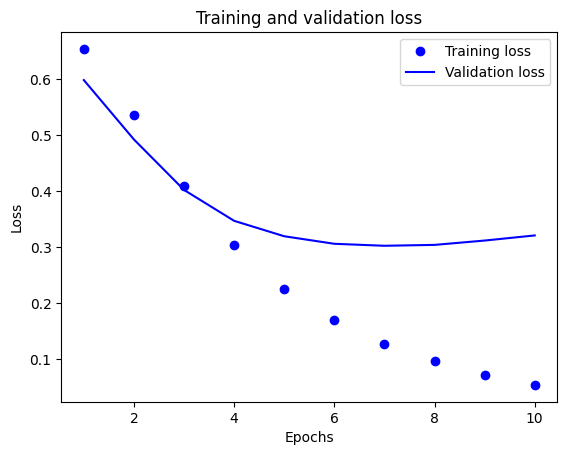

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

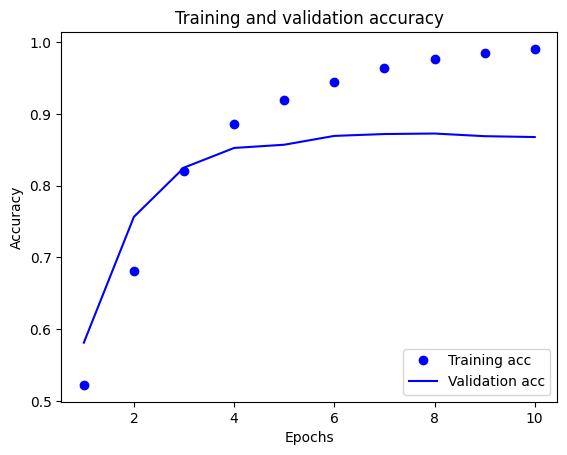

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

このグラフでは、点はトレーニングの損失と正解度を表し、実線は検証の損失と正解度を表します。

トレーニングの損失がエポックごとに*下降*し、トレーニングの正解度がエポックごとに*上昇*していることに注目してください。これは、勾配下降最適化を使用しているときに見られる現象で、イテレーションごとに希望する量を最小化します。

これは検証の損失と精度には当てはまりません。これらはトレーニング精度の前にピークに達しているようです。これが過適合の例で、モデルが、遭遇したことのないデータよりもトレーニングデータで優れたパフォーマンスを発揮する現象です。この後、モデルは過度に最適化し、テストデータに*一般化*しないトレーニングデータ*特有*の表現を学習します。

この特定のケースでは、検証の正解度が向上しなくなったときにトレーニングを停止することにより、過適合を防ぐことができます。これを行うには、`tf.keras.callbacks.EarlyStopping` コールバックを使用することができます。

## モデルをエクスポートする

上記のコードでは、モデルにテキストをフィードする前に、`TextVectorization` レイヤーをデータセットに適用しました。モデルで生の文字列を処理できるようにする場合 (たとえば、展開を簡素化するため)、モデル内に `TextVectorization` レイヤーを含めることができます。これを行うには、トレーニングしたばかりの重みを使用して新しいモデルを作成します。

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
batch_size = 32
seed = 42

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84125825/84125825 [==============================] - 8s 0us/step


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

ValueError: ignored

### 新しいデータの推論

新しい例の予測を取得するには、`model.predict()`を呼び出します。

In [ ]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

1/1 [==============================] - 0s 121ms/step


array([[0.6414361 ],
       [0.46666566],
       [0.38394597]], dtype=float32)

## 参考資料

- 文字列入力を使ったより一般的な方法やトレーニング中の正解率と損失の進捗に関するより詳細な分析については、[事前処理済みのテキストを使用したテキスト分類](./text_classification.ipynb)チュートリアルをご覧ください。
- TFHub のトレーニング済みモデルを使用して、[テキスト関連のチュートリアル](https://www.tensorflow.org/hub/tutorials#text-related-tutorials)を試してみてください。